<a href="https://colab.research.google.com/github/procoder-cyper/black_scholez_model/blob/main/blackscholeztrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install qfin

In [9]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + ((sigma**2)/2))*t) / (sigma * np.sqrt(t))
    d2 = d1 - (sigma * np.sqrt(t))
    C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
    return C

black_scholes_call(100, 100, .3, .05, 1)

np.float64(14.231254785985819)

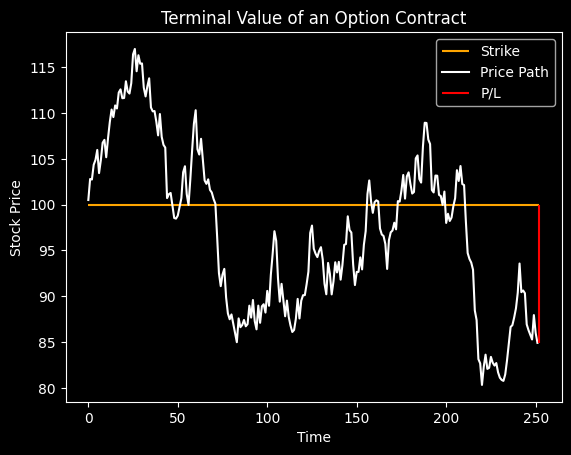

Premium at t=0: 14.231254785985819
P/L: -14.231254785985819


In [10]:
import matplotlib.pyplot as plt
import qfin as qf

# simulate dynamics of the underlying according to Geometric Brownian Motion
path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)


# create a chart of the price path and the strike price
plt.title("Terminal Value of an Option Contract")
plt.hlines(100, 0, 252, label='Strike', color='orange')
plt.plot(path.simulated_path, label='Price Path', color='white')
if max(path.simulated_path[-1] - 100, 0) == 0:
    plt.vlines(252, path.simulated_path[-1], 100, color='red', label="P/L")
else:
    plt.vlines(252, 100, path.simulated_path[-1], color='green', label="P/L")
plt.style.use('dark_background')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# print the premium and the resulting P/L
print("Premium at t=0:", black_scholes_call(100, 100, .3, .05, 1))
print("P/L:", max(path.simulated_path[-1] - 100, 0) - black_scholes_call(100, 100, .3, .05, 1))

In [11]:
print("Call Price:", black_scholes_call(100, 100, .3, .05, 1))
print("Market Maker Quote:", "13.43 @ 14.10")
print("Trade Edge:", black_scholes_call(100, 100, .3, .05, 1) - 14.10)

Call Price: 14.231254785985819
Market Maker Quote: 13.43 @ 14.10
Trade Edge: 0.13125478598581886


In [14]:
premium = 14.10 * 100
pls = []

for i in range(100000):
    path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

np.mean(pls)

np.float64(90.42906269372007)

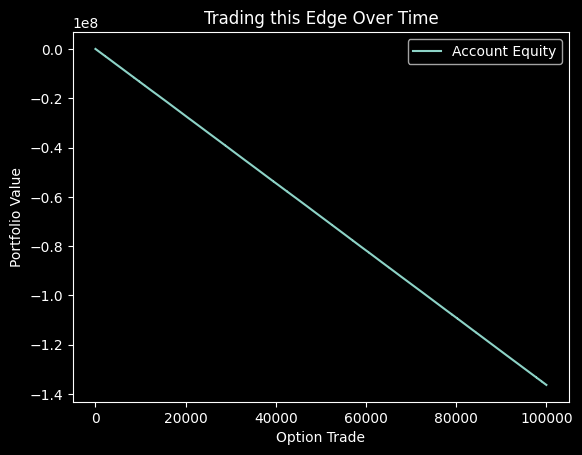

In [19]:
premium = 14.10 * 100
pls = []

for i in range(100000):
    path = qf.simulations.GeometricBrownianMotion(100, -.5, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

plt.title("Trading this Edge Over Time")
plt.plot(np.cumsum(pls), label="Account Equity")
plt.style.use('dark_background')
plt.xlabel('Option Trade')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()